<a href="https://colab.research.google.com/github/PaulNjinu254/SVM-Series/blob/main/SVM_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: Support vectors = 70
Iteration 100: Support vectors = 15
Iteration 200: Support vectors = 12
Iteration 300: Support vectors = 10
Iteration 400: Support vectors = 8
Iteration 500: Support vectors = 8
Iteration 600: Support vectors = 8
Iteration 700: Support vectors = 7
Iteration 800: Support vectors = 7
Iteration 900: Support vectors = 7
Accuracy: 0.95
Precision: 1.0
Recall: 0.8571428571428571


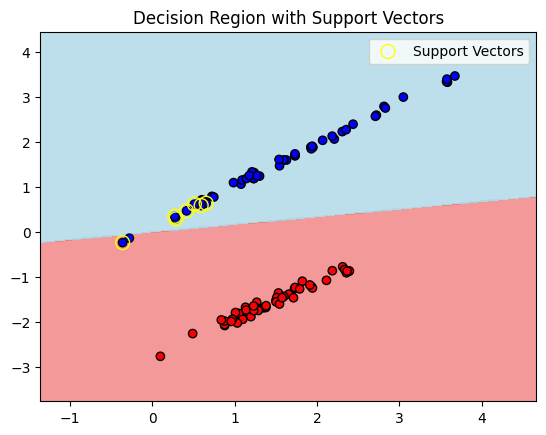

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap

class ScratchSVMClassifier():
    def __init__(self, num_iter, lr=0.01, kernel='linear', threshold=1e-5, verbose=False, gamma=1, theta_0=0, d=2):
        self.num_iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.theta_0 = theta_0
        self.d = d

    def _kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2.T)
        elif self.kernel == 'polynomial':
            return (self.gamma * np.dot(x1, x2.T) + self.theta_0) ** self.d
        else:
            raise ValueError("Unsupported kernel")

    def fit(self, X, y, X_val=None, y_val=None):
        y = y.copy()
        y[y == 0] = -1  # Convert labels to -1 and 1
        self.m, self.n = X.shape
        self.lam = np.zeros(self.m)

        K = self._kernel_function(X, X)

        for epoch in range(self.num_iter):
            for i in range(self.m):
                gradient = 1 - np.sum(self.lam * y * y[i] * K[:, i])
                self.lam[i] += self.lr * gradient
                if self.lam[i] < 0:
                    self.lam[i] = 0

            if self.verbose and epoch % 100 == 0:
                print(f"Iteration {epoch}: Support vectors = {np.sum(self.lam > self.threshold)}")

        self.index_support_vectors = np.where(self.lam > self.threshold)[0]
        self.lam_sv = self.lam[self.index_support_vectors]
        self.X_sv = X[self.index_support_vectors]
        self.y_sv = y[self.index_support_vectors]
        self.n_support_vectors = len(self.lam_sv)

    def _decision_function(self, X):
        K = self._kernel_function(X, self.X_sv)
        fx = np.sum(self.lam_sv * self.y_sv * K, axis=1)
        return fx

    def predict(self, X):
        fx = self._decision_function(X)
        return np.where(fx >= 0, 1, 0)

    def visualize_decision_boundary(self, X, y):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid).reshape(xx.shape)

        plt.contourf(xx, yy, Z, cmap=ListedColormap(['lightcoral', 'lightblue']), alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolors='k')
        plt.scatter(self.X_sv[:, 0], self.X_sv[:, 1], s=100, facecolors='none', edgecolors='yellow', label='Support Vectors')
        plt.title("Decision Region with Support Vectors")
        plt.legend()
        plt.show()

# Example usage with a simple dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = ScratchSVMClassifier(num_iter=1000, lr=0.01, kernel='linear', verbose=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

svm.visualize_decision_boundary(X, y)
